In [1]:
!source ./bin/activate

In [32]:
#importing modules 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
data_uri = "https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv"

In [5]:
#retrive data 

df = pd.read_csv(data_uri)

In [6]:
print(df)

                          time   latitude   longitude  depth   mag magType  \
0     2025-04-03T03:16:50.230Z  38.840668 -122.834335   1.32  0.53      md   
1     2025-04-03T03:08:03.540Z  61.556800 -141.271600  13.40  1.20      ml   
2     2025-04-03T02:59:56.724Z  61.789200 -149.608200  38.70  1.20      ml   
3     2025-04-03T02:54:35.248Z  60.081400 -152.528700  97.80  1.40      ml   
4     2025-04-03T02:41:42.280Z  35.639833 -117.548500   8.08  0.89      ml   
...                        ...        ...         ...    ...   ...     ...   
9588  2025-03-04T03:25:43.640Z  44.739000 -111.123333   7.15 -0.37      md   
9589  2025-03-04T03:24:58.760Z  37.428500 -119.018500   3.69  1.70      md   
9590  2025-03-04T03:22:28.320Z  44.726000 -111.120667   2.38 -0.92      md   
9591  2025-03-04T03:20:13.493Z -57.288500  147.327500  10.00  4.50      mb   
9592  2025-03-04T03:18:45.450Z  39.360500 -111.194500  -0.61  1.44      md   

       nst    gap       dmin   rms  ...                   updat

In [7]:
features = ['latitude', 'longitude','depth']
label = 'mag'

# choosing features and label data for regression purpose

In [8]:
# data preprocessing
df = df.dropna(subset=[label])

In [9]:
#doing in features

for col in features:
    df[col] = df[col].fillna(df[col].median())

<function matplotlib.pyplot.show(close=None, block=None)>

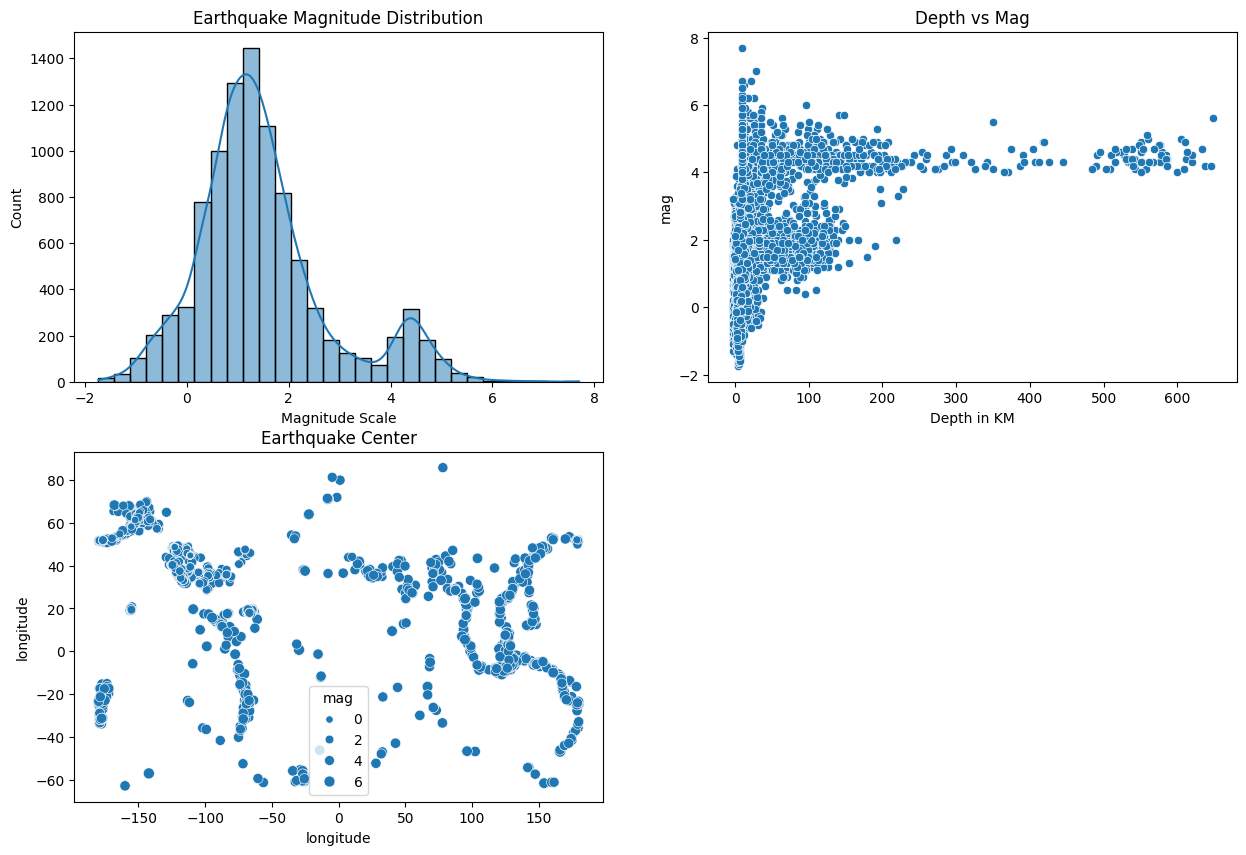

In [24]:
#some basic visuals for data analysis
plt.figure(figsize=(15,10))

# first plot --subplots
plt.subplot(2,2,1)
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude Scale")
sb.histplot(df[label],kde=True,bins=30)

# second plot
plt.subplot(2,2,2)
plt.title("Depth vs Mag")
plt.xlabel("Depth in KM")
sb.scatterplot(x='depth',y=label,data=df,)
plt.show

# third plot  -globe locations
plt.subplot(2,2,3)
plt.title("Earthquake Center")
plt.xlabel("longitude")
plt.ylabel("longitude")
sb.scatterplot(x='longitude',y='latitude',size=label,data=df)


plt.show

In [20]:
# getting features and labels 

feature_data = df[features]
label_data = df[label]
print(feature_data)

       latitude   longitude  depth
0     38.840668 -122.834335   1.32
1     61.556800 -141.271600  13.40
2     61.789200 -149.608200  38.70
3     60.081400 -152.528700  97.80
4     35.639833 -117.548500   8.08
...         ...         ...    ...
9588  44.739000 -111.123333   7.15
9589  37.428500 -119.018500   3.69
9590  44.726000 -111.120667   2.38
9591 -57.288500  147.327500  10.00
9592  39.360500 -111.194500  -0.61

[9592 rows x 3 columns]


In [25]:
#split in training and testing data 

train_ft,test_ft,train_lb,test_lb=train_test_split(feature_data,label_data,test_size=0.2,random_state=100)

# ramdom state means making the same data split into that one

In [28]:
regr_model = RandomForestRegressor()

In [29]:
trained_model = regr_model.fit(train_ft,train_lb)

In [30]:
# predicting magnitude
print("Actual mag : values ",test_lb) 

Actual mag : values  8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [31]:
predicted_mag = trained_model.predict(test_ft)
print(predicted_mag)

[0.9287 1.5409 0.0785 ... 1.601  1.1911 0.9189]


In [25]:
#split in training and testing data 

train_ft,test_ft,train_lb,test_lb=train_test_split(feature_data,label_data,test_size=0.2,random_state=100)

# ramdom state means making the same data split into that one

In [26]:

regr_model = RandomForestRegressor()


In [27]:

trained_model = regr_model.fit(train_ft,train_lb)

In [28]:
# predicting magnitude
print("Actual mag : values ",test_lb) 


Actual mag : values  8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [29]:
predicted_mag = trained_model.predict(test_ft)
print(predicted_mag)

[0.897  1.5859 0.0579 ... 1.625  1.206  0.9442]


In [33]:
print(test_lb)

8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [34]:
# doing model evaluation using MSE
error = mean_squared_error(test_lb,predicted_mag)
print("error", error)

error 0.24046938894807104


In [35]:
# only till 4 points
print(f"Model MSE : {error:.4f}")

Model MSE : 0.2405
